In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

* scale features
* choose how many clusters you want
* choose cluster centroids
* assign points to centroids
* recompute centroids based on average of cluster
* go until you converge or your surpass max number of runs

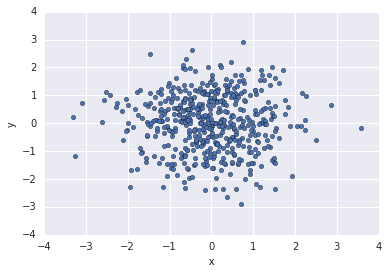

In [165]:
random_frame = pd.DataFrame(np.random.randn(500, 2), columns=["x", "y"])
df.plot(kind='scatter', x='x', y='y')

In [162]:
from numpy import square, sqrt, setdiff1d
CLUSTER = "cluster"

scaled = random_frame / random_frame.max()
def cluster(frame, n_clusters=5, n_iter=1000):
    cols = setdiff1d(scaled.columns.tolist(), [CLUSTER])
    centroids = frame.sample(n_clusters) # randomly pick clusters. There are other ways to pick.
    ii = 0
    while True:
        ii += 1
        frame[CLUSTER] = _cluster_assignments(frame[cols], centroids[cols])
        old_centroids = centroids.copy(deep=True)
        centroids = scaled.groupby(CLUSTER).mean()
        if old_centroids[cols].equals(centroids[cols]) or ii > n_iter:
            break
    return frame[CLUSTER]

returned = cluster(scaled, n_iter=10)

In [163]:
random_frame["cluster"] = returned

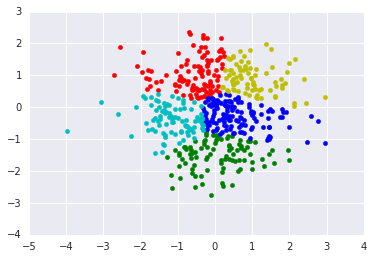

In [164]:
import seaborn as sns
from matplotlib import pyplot as plt

color_codes = {
    0: 'r',
    1: 'g',
    2: 'b',
    3: 'y',
    4: 'c'
}

for (cluster, color) in color_codes.items():
    rows = random_frame[random_frame["cluster"] == cluster]
    plt.scatter(rows["x"], rows["y"], color=color)
plt.show()

### Assign points to clusters

In [100]:
def _cluster_assignments(frame, centroids):
    return scaled.apply(lambda x: _find_closest(x, centroids), axis=1) # assign each point to a cluster
    
def _find_closest(point, points):
    distances = points.apply(_dist_from(point), axis=1)
    return distances.reset_index().sort_values(by=0).iloc[0].name

def _dist_from(point):
    return lambda x: _dist(x, point)
    
def _dist(point_one, point_two):
    return sqrt(square((point_one - point_two)).sum())

### Recomputing cluster centroids